This notebook demonstrates the use of Python to explore a dataset containing offensive speech along with other attributes. Learning goals of this notebook - <br>
* Organize the data in Pandas dataframe, a key data structure of Python
* Provide some descriptive statistics about the dataset
* Prepare the documents containing offensive speeches for further texual analysis by removing stopwords, lowercasing, stemming, etc
* Use CountVectorizer module to convert the collection of speeches (or, comments/tweets/documents, etc) into a matrix containing term or word frequencies in each document
* Calculate TF-IDF score of each term or word to determine the importance of that term in a specific document

Content Warning: The fetched dataset in this notebook contains hateful and harrassing comments which some may find offensive. 

Author: Saklain Zaman

In [ ]:
# Code Block 1
# URL of the dataset as csv file in github repo

url = "https://raw.githubusercontent.com/jmstanto/speechdata/main/Fox%20News%20Data/Fox_News_Data_Exerpt.csv"

In [ ]:
# Code Block 2
import pandas as pd
import requests
import io

In [ ]:
# Code Block 3
# Read the csv file from url into a Pandas dataframe
df = pd.read_csv(url) 
print(df.head())

                                               title  \
0              First lady Obama takes swipe at Trump   
1  Texas, 12 states to ask judge to stall Obama t...   
2  Navy names ship after gay rights advocate Harv...   
3  ICE program failing to rid US of dangerous ill...   
4  Fury as feminist blames toddler alligator deat...   

                                                text  label  \
0  No, get it right. It's not Michelle, but in re...      1   
1  By telling them they can't use the bathroom or...      0   
2  I will. So, you are saying the the AP is incor...      0   
3  There is No God. Santa Never Came Down the Chi...      0   
4  I'm sure its getting some weird satisfaction i...      1   

                                                succ  \
0  Is that the reason buckwheat pass the lgbt bil...   
1  someone use the bathroom of their actual gende...   
2                                Yes I am. Have fun.   
3            and yet these fools still vote for Dems   
4   

In the given code, the dataset is stored in a pandas dataframe, a rectangular data structure. Pandas provide various in-built capabilities for performing analytical tasks.

In [ ]:
# Code Block 4
df.shape  # This dataset has 153 rows and 8 columns as different attributes

(153, 8)

In [ ]:
# Code Block 5
list(df.columns) # The 8 columns contain the texts of the documents and various attributes of the document

['title', 'text', 'label', 'succ', 'meta', 'user', 'mentions', 'prev']

In [ ]:
# Code Block 6 
df[['title','text','meta']] # Snapshot of the contents of a few columns

,title,text,meta
0,First lady Obama takes swipe at Trump,"No, get it right. It's not Michelle, but in re...",First lady Michelle Obama on Friday jumped int...
1,"Texas, 12 states to ask judge to stall Obama t...",By telling them they can't use the bathroom or...,Texas and 12 other states are asking a federal...
2,Navy names ship after gay rights advocate Harv...,"I will. So, you are saying the the AP is incor...",The Navy is naming a ship in honor of the late...
3,ICE program failing to rid US of dangerous ill...,There is No God. Santa Never Came Down the Chi...,A federal program to work with local law enfor...
4,Fury as feminist blames toddler alligator deat...,I'm sure its getting some weird satisfaction i...,A white Chicago-based Social Justice Warrior w...
...,...,...,...
148,Navy names ship after gay rights advocate Harv...,The next one will be Margaret Sanger,The Navy is naming a ship in honor of the late...
149,Navy names ship after gay rights advocate Harv...,lol,The Navy is naming a ship in honor of the late...
150,Fury as feminist blames toddler alligator deat...,"Talk about ""Racist!",A white Chicago-based Social Justice Warrior w...
151,States moving to restore work requirements for...,"Benefits are based on wages. No work, no socia...",States are moving to once again require able-b...


The pandas DataFrame has 153 documents for offensive speech detection. Other attributes of the comments are also stored in the DataFrame.



In [ ]:
# Code Block 7
texts = df['text'] 
print("Total documents:", len(texts))
texts # 153 documents 

Total documents: 153


0      No, get it right. It's not Michelle, but in re...
1      By telling them they can't use the bathroom or...
2      I will. So, you are saying the the AP is incor...
3      There is No God. Santa Never Came Down the Chi...
4      I'm sure its getting some weird satisfaction i...
                             ...                        
148                 The next one will be Margaret Sanger
149                                                  lol
150                                  Talk about "Racist!
151    Benefits are based on wages. No work, no socia...
152    I don't believe you have any right to judge th...
Name: text, Length: 153, dtype: object

In [ ]:
# Code Block 8
# Some descriptive statistics about the dataset
df.describe(include='all') 

,title,text,label,succ,meta,user,mentions,prev
count,153,153,153.000000,86,153,153,77,77
unique,10,153,NaN,85,10,127,68,52
top,"Texas, 12 states to ask judge to stall Obama t...","No, get it right. It's not Michelle, but in re...",NaN,"A wise Indian chief once said, ""Sure you can t...",Texas and 12 other states are asking a federal...,SB117,@Sierra415,Transgender people have existed since the begi...
freq,24,1,NaN,2,24,6,3,6
mean,NaN,NaN,0.287582,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.454122,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Code Block 9
# Count of the elements in a specific column
df['mentions'].count()

77

In [ ]:
# Code Block 10
# Count of distinct elements in different columns
df.nunique()

title        10
text        153
label         2
succ         85
meta         10
user        127
mentions     68
prev         52
dtype: int64

For further texual analysis of the documents, the documents need to be cleaned, and then, converted into a **Document-Term Frequency Matrix**. In this step, from the documents, the stop words are removed, words are converted to lowercase, words are stemmed, and finally, a pandas dataframe will be generated containing term frequencies. <br>

In the dataframe, each row represent a document and there are columns equal to total number of words in the vocabulary. This is generally a very sparse matrix as most of the words don't appear in a single document but there's a lot of words in the vocabulary.

**CountVectorizer** module from sklearn is used to create a document-term frequency matrix from the tweets. Each integer element in the matrix represent the frequency of the respective word in a specific document.

In [ ]:
# Code Block 11
# Import some important libraries 
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer

In [ ]:
# Code Block 12
# Import the list of stopwords
all_stopwords = text.ENGLISH_STOP_WORDS

# Create a stemmer object 
stemmer = PorterStemmer()

# Helper function for stemming 
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc)) 

In [ ]:
# Code Block 13
# Create countvectorizer object  
# Supports preprocessing (lowercasing, removing stopwords, stemming) on raw data
vectorizer = CountVectorizer(lowercase=True, stop_words=all_stopwords, analyzer=stemmed_words) 

In [ ]:
# Code Block 14
# Create sparse DTM (Document-Term Matrix)
spDTM = vectorizer.fit_transform(df['text'])

# Store the DTM in pandas dataframe
spDTM = pd.DataFrame(spDTM.toarray())

# Set the column/feature names as document terms
spDTM.columns = vectorizer.get_feature_names_out()

In [ ]:
# Code Block 15
spDTM # Display the DTM for the collection of documents

,100m,123,1898,1912,2003,2016,2020,30,50,6th,...,write,wrong,ya,ye,yeah,year,yet,york,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Code Block 16
spDTM.shape # The vocabulary size should be 1070 and there's 153 documents in total

(153, 1070)

In [ ]:
# Code Block 17
spDTM.info() # Some additional information about the datatype, count and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Columns: 1070 entries, 100m to your
dtypes: int64(1070)
memory usage: 1.2 MB


In [ ]:
# Code Block 18
# Get the list of vocabulary with their frequency from the vectorizer object
vocabulary_ = list(vectorizer.vocabulary_.keys())

In [ ]:
# Code Block 19
# Check the number of tokens in the vocabulary 
print(len(vocabulary_)) 

1070


In [ ]:
# Code Block 20
# Print the list of vocabulary
print(vocabulary_) 

['no', 'get', 'it', 'right', 'not', 'michel', 'but', 'in', 'realiti', 'michael', 'obama', 'she', 'is', 'he', 'by', 'tell', 'them', 'they', 'can', 'use', 'the', 'bathroom', 'or', 'facil', 'of', 'gender', 'that', 're', 'live', 'as', 'and', 'under', 'medic', 'mental', 'health', 'guidanc', 'to', 'have', 'been', 'for', 'decad', 'will', 'so', 'you', 'are', 'say', 'ap', 'incorrect', 'on', 'there', 'god', 'santa', 'never', 'came', 'down', 'chimney', 'too', 'much', 'senseless', 'violenc', 'sure', 'some', 'weird', 'satisfact', 'attent', 'thi', 'garner', 'mayb', 'parent', 'ignor', 'whatev', 'creepi', 'thing', 'speak', 'volum', 'about', 'own', 'lack', 'intellig', 'charact', 'compass', 'feel', 'sorri', 'actual', 'well', 'said', 'lie', 'redefin', 'sens', 'mean', 'disagr', 'trump', 'sad', 'want', 'build', 'wall', 'keep', 'illeg', 'out', 'deport', 'current', 'us', 'those', 'here', 'legal', 'democrat', 'need', 'vote', 'gfi', 'whi', 'time', 'vision', 'check', 'mooch', 'look', 'more', 'like', 'aunt', 'es

In [ ]:
# Code Block 21
# A snippet of the term occurrences in different documents. 
# This matrix is sparse
spDTM.iloc[25:35, 150:160]

,can,candid,cannot,cant,cap,capabl,captur,card,care,carolina
25,1,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,1,0
27,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0
29,2,0,0,0,0,0,1,0,0,0
30,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Code Block 22
# Print the trimmed list of vocabulary
vocabulary = spDTM.columns # Extract the vocabulary from the columns/feature names


In [ ]:
# Code Block 23
# After reducing the rare words, the size of vocabulary
len(vocabulary)

1070

In [ ]:
# Code Block 24
print(vocabulary[0:20]) # First 20 terms in alphabetical order

Index(['100m', '123', '1898', '1912', '2003', '2016', '2020', '30', '50',
       '6th', 'abil', 'about', 'abov', 'abus', 'accept', 'accompani',
       'accomplish', 'accur', 'accuraci', 'accus'],
      dtype='object')


The terms present in the collection of document can be visually displayed as a wordcloud. <br>
The modules - **wordcloud** and **matplotlib** are used to demonstrate this visualization.

In [ ]:
# Code Block 25
# !pip install wordcloud
# !pip install matplotlib

In [ ]:
# Code Block 26
# Import wordcloud and matplotlib module to create and display a wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Code Block 27
# Append all the words in the vocabulary to match the input format of the wordcloud module
vocabulary_str = ' '.join(vocabulary).lower()

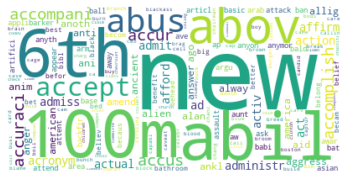

In [ ]:
# Code Block 28
# Create the wordcloud object
wordcloud = WordCloud(stopwords = all_stopwords,
                      collocations=True,
                      background_color='white'
                      ).generate(vocabulary_str)

# Plot the wordcloud object using matplotlib
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()


We want to understand how relevant a word is in a document or comment, considering the collection of documents. **TF-IDF (Term Frequency - Inverse Document Frequency)** is an approach to measure this. 

TF-IDF is the multiplication of two terms - TF and IDF. <br>
**TF** represents the frequency of a word or term in a document (or, comment). <br>
**IDF** is the logarithm of total number of documents divided by the number of documents containing the specific term plus 1. 

TF-IDF score helps to quantify the relevancy of a term or word in a collection of documents.

L2 normalization can be applied to calculated TF-IDF scores to scale the values. It scales the values in every row in such a way that if all the values in a row are squared and summed, the result will be 1.

Built-in model from sklearn is imported for calculating the TF-IDF scores.

In [ ]:
# Code Block 29
# Import model for TF-IDF calculation from sklearn
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
# Code Block 30
# Get TfidfTransformer model with L2 normalization
tfidf_transformer = TfidfTransformer(norm='l2') 

# Use the DTM as input to the TfidfTransformer model
sp_tf_idf = tfidf_transformer.fit_transform(spDTM) 

# Convert the generated tf-idf matrix to pandas dataframe
sp_tf_idf = pd.DataFrame(sp_tf_idf.toarray()) 

# Use the features(words) as the column names of the tf-idf matrix
sp_tf_idf.columns = tfidf_transformer.get_feature_names_out() 

print(sp_tf_idf.shape)

sp_tf_idf.iloc[25:35, 150:160]

(153, 1070)


,can,candid,cannot,cant,cap,capabl,captur,card,care,carolina
25,0.164033,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
26,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.358973,0.0
27,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
28,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
29,0.225688,0.0,0.0,0.0,0.0,0.0,0.181145,0.0,0.000000,0.0
30,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
31,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
32,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
33,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
34,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [ ]:
# Code Block 31
print("Tf-idf matrix using TfidfTransformer:\n")
print(round(sp_tf_idf.iloc[25:35, 150:160],2))

Tf-idf matrix using TfidfTransformer:

     can  candid  cannot  cant  cap  capabl  captur  card  care  carolina
25  0.16     0.0     0.0   0.0  0.0     0.0    0.00   0.0  0.00       0.0
26  0.00     0.0     0.0   0.0  0.0     0.0    0.00   0.0  0.36       0.0
27  0.00     0.0     0.0   0.0  0.0     0.0    0.00   0.0  0.00       0.0
28  0.00     0.0     0.0   0.0  0.0     0.0    0.00   0.0  0.00       0.0
29  0.23     0.0     0.0   0.0  0.0     0.0    0.18   0.0  0.00       0.0
30  0.00     0.0     0.0   0.0  0.0     0.0    0.00   0.0  0.00       0.0
31  0.00     0.0     0.0   0.0  0.0     0.0    0.00   0.0  0.00       0.0
32  0.00     0.0     0.0   0.0  0.0     0.0    0.00   0.0  0.00       0.0
33  0.00     0.0     0.0   0.0  0.0     0.0    0.00   0.0  0.00       0.0
34  0.00     0.0     0.0   0.0  0.0     0.0    0.00   0.0  0.00       0.0


In [ ]:
# Code Block 32
print("Actual word frequency for comparison:\n")
print(spDTM.iloc[25:35, 150:160])

Actual word frequency for comparison:

    can  candid  cannot  cant  cap  capabl  captur  card  care  carolina
25    1       0       0     0    0       0       0     0     0         0
26    0       0       0     0    0       0       0     0     1         0
27    0       0       0     0    0       0       0     0     0         0
28    0       0       0     0    0       0       0     0     0         0
29    2       0       0     0    0       0       1     0     0         0
30    0       0       0     0    0       0       0     0     0         0
31    0       0       0     0    0       0       0     0     0         0
32    0       0       0     0    0       0       0     0     0         0
33    0       0       0     0    0       0       0     0     0         0
34    0       0       0     0    0       0       0     0     0         0
